In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


#  Exploratory Data Analysis

In [ ]:
import pandas as pd

df = pd.read_csv("/content/gdrive/MyDrive/OneDrive_2024-07-21/ML Coursework Dataset - A3/Met dataset - 2015-to-2022_12months.csv")
df.head()

,x_coord,y_coord,year,groundfrost_1,groundfrost_2,groundfrost_3,groundfrost_4,groundfrost_5,groundfrost_6,groundfrost_7,...,rainfall_3,rainfall_4,rainfall_5,rainfall_6,rainfall_7,rainfall_8,rainfall_9,rainfall_10,rainfall_11,rainfall_12
0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['x_coord', 'y_coord', 'year', 'groundfrost_1', 'groundfrost_2',
       'groundfrost_3', 'groundfrost_4', 'groundfrost_5', 'groundfrost_6',
       'groundfrost_7',
       ...
       'rainfall_3', 'rainfall_4', 'rainfall_5', 'rainfall_6', 'rainfall_7',
       'rainfall_8', 'rainfall_9', 'rainfall_10', 'rainfall_11',
       'rainfall_12'],
      dtype='object', length=111)

In [ ]:
df.describe()

,x_coord,y_coord,year,groundfrost_1,groundfrost_2,groundfrost_3,groundfrost_4,groundfrost_5,groundfrost_6,groundfrost_7,...,rainfall_3,rainfall_4,rainfall_5,rainfall_6,rainfall_7,rainfall_8,rainfall_9,rainfall_10,rainfall_11,rainfall_12
count,33235.000000,33235.000000,33235.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,...,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000
mean,12.000000,12.000000,4.047059,7.967022,7.896864,7.882327,7.836455,7.695970,7.654871,7.630654,...,95.995318,95.486136,95.844339,95.301693,95.216766,94.560505,94.549497,95.647443,96.745711,96.063469
std,6.633349,6.633349,2.034474,6.876222,6.811918,6.797362,6.753774,6.754930,6.782279,6.803408,...,67.624812,67.387678,67.288719,67.226370,67.326613,67.380575,67.405788,67.962742,68.644804,67.472499
min,1.000000,1.000000,1.000000,0.008231,0.008231,0.008231,0.008231,0.008231,0.008231,0.008231,...,0.857498,0.857498,0.857498,0.857498,0.283924,0.283924,0.283924,0.283924,0.283924,0.283924
25%,6.000000,6.000000,2.000000,0.946713,0.946713,0.946713,0.946713,0.892294,0.840970,0.766635,...,50.293493,49.960026,50.376627,49.843740,49.863634,48.971950,48.844115,49.430539,49.738957,49.695789
50%,12.000000,12.000000,4.000000,7.034082,7.007468,7.007468,7.007468,6.726112,6.668558,6.668558,...,79.722113,79.473167,79.702599,79.180876,79.185051,78.349925,78.301519,79.532978,80.573750,80.528417
75%,18.000000,18.000000,6.000000,13.748285,13.558181,13.483028,13.270946,13.101273,13.101273,13.101273,...,123.035748,122.568040,122.771428,122.047166,122.068409,121.199505,121.243839,122.771428,124.337335,123.714835
max,23.000000,23.000000,8.000000,28.015332,28.015332,28.015332,28.015332,28.015332,28.015332,28.015332,...,697.134520,697.134520,697.134520,697.134520,697.134520,697.134520,697.134520,697.134520,697.134520,697.134520


#Null Handling

In [ ]:
df.isna().sum()

,0
x_coord,0
y_coord,0
year,0
groundfrost_1,26605
groundfrost_2,26605
...,...
rainfall_8,26605
rainfall_9,26605
rainfall_10,26605
rainfall_11,26605


In [ ]:
all_cols = list(df.columns)
# Removing first three columns because we are not going to use for interpolation
all_cols.pop(0)
all_cols.pop(0)
all_cols.pop(0)
columns_to_be_interpolated = all_cols
df.interpolate(method='polynomial', order=3, inplace = True) # used for filling null values
df.isna().sum()

,0
x_coord,0
y_coord,0
year,0
groundfrost_1,80
groundfrost_2,80
...,...
rainfall_8,80
rainfall_9,80
rainfall_10,80
rainfall_11,80


In [ ]:
df.fillna(method="bfill", inplace=True)
df.fillna(method="ffill", inplace=True)
# filling remained null values

<ipython-input-7-03906e2dc363>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)
<ipython-input-7-03906e2dc363>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [ ]:
df.isna().sum()

,0
x_coord,0
y_coord,0
year,0
groundfrost_1,0
groundfrost_2,0
...,...
rainfall_8,0
rainfall_9,0
rainfall_10,0
rainfall_11,0


In [ ]:
metadata = pd.read_excel("/content/gdrive/MyDrive/OneDrive_2024-07-21/ML Coursework Dataset - A3/METADATA.xlsx")
metadata.head(20)

,ABBREVIATION,NAME,DESCRIPTION,UNIT,SCALE RESOLUTION,FREQUENCY,AGGREGATION OVER TIME,SOURCE
0,x_coord,Projection x coordinate ID,Refers to projection x coordinate,categorical,NaN,NaN,NaN,NaN
1,y_coord,Projection y coordinate ID,Refers to projection y coordinate,categorical,NaN,NaN,NaN,NaN
2,month,Month,Month counting from Jan,ordinal,1.00,NaN,NaN,NaN
3,year,Year,Year,numeric,1.00,NaN,NaN,NaN
4,groundfrost,Days of ground frost,Number of days with surface temperature below ...,days,1.00,monthly,"inimum within days time, sum over days",HadUK-Grid_v1.2.0.0 (Gridded surface climate o...
5,hurs,Relative humidity,Relative humidity at 1.5m,%,0.01,monthly,mean,HadUK-Grid_v1.2.0.0 (Gridded surface climate o...
6,psl,Sea level pressure,Air pressure at mean sea level,hPa,1.00,monthly,mean,HadUK-Grid_v1.2.0.0 (Gridded surface climate o...
7,pv,Vapour pressure,Partial pressure of water vapour in the air,hPa,1.00,monthly,mean,HadUK-Grid_v1.2.0.0 (Gridded surface climate o...
8,rainfall,Total rainfall,Amount thickness of precipitation (liquid wate...,mm,1.00,monthly,sum,HadUK-Grid_v1.2.0.0 (Gridded surface climate o...
9,sfcWind,Wind speed,Wind speed at 10m,m/s,1.00,monthly,mean,HadUK-Grid_v1.2.0.0 (Gridded surface climate o...


# Applying Normalization

This step is important for the network to converge faster

In [ ]:
from sklearn.preprocessing import StandardScaler
data = df[columns_to_be_interpolated].values
scaler = StandardScaler()
normalised_data = scaler.fit_transform(data)
df[columns_to_be_interpolated] = normalised_data

In [ ]:
df

,x_coord,y_coord,year,groundfrost_1,groundfrost_2,groundfrost_3,groundfrost_4,groundfrost_5,groundfrost_6,groundfrost_7,...,rainfall_3,rainfall_4,rainfall_5,rainfall_6,rainfall_7,rainfall_8,rainfall_9,rainfall_10,rainfall_11,rainfall_12
0,1,1,1,0.159461,0.243993,0.268533,-0.047677,-0.261508,-0.299759,-0.324180,...,0.052051,-0.067959,0.140319,0.066369,0.174762,0.412318,0.135954,0.142387,0.405820,0.440769
1,1,1,1,0.159461,0.243993,0.268533,-0.047677,-0.261508,-0.299759,-0.324180,...,0.052051,-0.067959,0.140319,0.066369,0.174762,0.412318,0.135954,0.142387,0.405820,0.440769
2,1,1,1,0.159461,0.243993,0.268533,-0.047677,-0.261508,-0.299759,-0.324180,...,0.052051,-0.067959,0.140319,0.066369,0.174762,0.412318,0.135954,0.142387,0.405820,0.440769
3,1,1,1,0.159461,0.243993,0.268533,-0.047677,-0.261508,-0.299759,-0.324180,...,0.052051,-0.067959,0.140319,0.066369,0.174762,0.412318,0.135954,0.142387,0.405820,0.440769
4,1,1,1,0.159461,0.243993,0.268533,-0.047677,-0.261508,-0.299759,-0.324180,...,0.052051,-0.067959,0.140319,0.066369,0.174762,0.412318,0.135954,0.142387,0.405820,0.440769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33230,23,23,8,-0.049028,0.335120,0.020336,0.278623,-0.239803,-0.301679,-0.324111,...,-0.064859,-0.034488,0.047926,0.050288,0.139226,0.207110,0.088354,0.245068,0.280483,0.329836
33231,23,23,8,-0.049028,0.335120,0.020336,0.278623,-0.239803,-0.301679,-0.324111,...,-0.064859,-0.034488,0.047926,0.050288,0.139226,0.207110,0.088354,0.245068,0.280483,0.329836
33232,23,23,8,-0.049028,0.335120,0.020336,0.278623,-0.239803,-0.301679,-0.324111,...,-0.064859,-0.034488,0.047926,0.050288,0.139226,0.207110,0.088354,0.245068,0.280483,0.329836
33233,23,23,8,-0.049028,0.335120,0.020336,0.278623,-0.239803,-0.301679,-0.324111,...,-0.064859,-0.034488,0.047926,0.050288,0.139226,0.207110,0.088354,0.245068,0.280483,0.329836


# Encoding Coordinates

In [ ]:
# merging x and y coordinates to get a single coordinate value
coord_arr = []
for index,row in df.iterrows():
  new_val = str(int(row["x_coord"])) + "," +  str(int(row["y_coord"]))
  coord_arr.append(new_val)

df["coordinate"] = coord_arr
df.drop(columns=['x_coord', 'y_coord'],inplace = True)

<ipython-input-12-71f9ffb020cc>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["coordinate"] = coord_arr


In [ ]:
df["coordinate"].unique() # checking the number of unique values

array(['1,1', '2,2', '3,3', '4,4', '5,5', '6,6', '7,7', '8,8', '9,9',
       '10,10', '11,11', '12,12', '13,13', '14,14', '15,15', '16,16',
       '17,17', '18,18', '19,19', '20,20', '21,21', '22,22', '23,23'],
      dtype=object)

In [ ]:
# Encoding the coordinates manually

encoded_values = []
for index,row in df.iterrows():
  if row["coordinate"] == "1,1":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "2,2":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "3,3":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "4,4":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "5,5":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "6,6":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "7,7":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "8,8":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "9,9":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "10,10":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "11,11":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "12,12":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "13,13":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "14,14":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "15,15":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "16,16":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "17,17":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "18,18":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "19,19":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "20,20":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "21,21":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "22,22":
    encoded_values.append(int(row["coordinate"].split(",")[0]))
  if row["coordinate"] == "23,23":
    encoded_values.append(int(row["coordinate"].split(",")[0]))

df["coordinate"] = encoded_values

In [ ]:
df

,year,groundfrost_1,groundfrost_2,groundfrost_3,groundfrost_4,groundfrost_5,groundfrost_6,groundfrost_7,groundfrost_8,groundfrost_9,...,rainfall_4,rainfall_5,rainfall_6,rainfall_7,rainfall_8,rainfall_9,rainfall_10,rainfall_11,rainfall_12,coordinate
0,1,0.159461,0.243993,0.268533,-0.047677,-0.261508,-0.299759,-0.324180,-0.323935,-0.299057,...,-0.067959,0.140319,0.066369,0.174762,0.412318,0.135954,0.142387,0.405820,0.440769,1
1,1,0.159461,0.243993,0.268533,-0.047677,-0.261508,-0.299759,-0.324180,-0.323935,-0.299057,...,-0.067959,0.140319,0.066369,0.174762,0.412318,0.135954,0.142387,0.405820,0.440769,1
2,1,0.159461,0.243993,0.268533,-0.047677,-0.261508,-0.299759,-0.324180,-0.323935,-0.299057,...,-0.067959,0.140319,0.066369,0.174762,0.412318,0.135954,0.142387,0.405820,0.440769,1
3,1,0.159461,0.243993,0.268533,-0.047677,-0.261508,-0.299759,-0.324180,-0.323935,-0.299057,...,-0.067959,0.140319,0.066369,0.174762,0.412318,0.135954,0.142387,0.405820,0.440769,1
4,1,0.159461,0.243993,0.268533,-0.047677,-0.261508,-0.299759,-0.324180,-0.323935,-0.299057,...,-0.067959,0.140319,0.066369,0.174762,0.412318,0.135954,0.142387,0.405820,0.440769,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33230,8,-0.049028,0.335120,0.020336,0.278623,-0.239803,-0.301679,-0.324111,-0.324368,-0.232580,...,-0.034488,0.047926,0.050288,0.139226,0.207110,0.088354,0.245068,0.280483,0.329836,23
33231,8,-0.049028,0.335120,0.020336,0.278623,-0.239803,-0.301679,-0.324111,-0.324368,-0.232580,...,-0.034488,0.047926,0.050288,0.139226,0.207110,0.088354,0.245068,0.280483,0.329836,23
33232,8,-0.049028,0.335120,0.020336,0.278623,-0.239803,-0.301679,-0.324111,-0.324368,-0.232580,...,-0.034488,0.047926,0.050288,0.139226,0.207110,0.088354,0.245068,0.280483,0.329836,23
33233,8,-0.049028,0.335120,0.020336,0.278623,-0.239803,-0.301679,-0.324111,-0.324368,-0.232580,...,-0.034488,0.047926,0.050288,0.139226,0.207110,0.088354,0.245068,0.280483,0.329836,23


# Feature Selection

We are selecting a subsample of features which will represent the whole data since we have about 110 columns. I examined the correlation values of columns with the last month of relative humidity value below.

In [ ]:
result = df.corr()['hurs_12']
most_correlated_features = {}
for key,val in dict(result).items():
  if val > 0.5 or val < -0.5: # Correlation values above 0.5 will be deterministic columns of predicting the relative humidity value
    most_correlated_features[key] = val

most_correlated_features


{'groundfrost_7': -0.6637322307711935,
 'groundfrost_8': -0.615729577732665,
 'groundfrost_9': -0.5471283692107426,
 'hurs_1': 0.6212919549338822,
 'hurs_2': 0.5430099940555518,
 'hurs_10': 0.5963782924980944,
 'hurs_11': 0.7756763877942998,
 'hurs_12': 1.0,
 'pv_9': 0.5256784832126837,
 'tas_6': 0.5338930229777396,
 'tas_7': 0.6030875256223778,
 'tas_8': 0.5817348937959218}

In [ ]:
trainable_cols = list(most_correlated_features.keys())
trainable_cols.append("year")
trainable_cols.append("coordinate")
trainable_df = df[trainable_cols]
trainable_df.head()

,groundfrost_7,groundfrost_8,groundfrost_9,hurs_1,hurs_2,hurs_10,hurs_11,hurs_12,pv_9,tas_6,tas_7,tas_8,year,coordinate
0,-0.32418,-0.323935,-0.299057,-0.07937,-0.092607,0.105452,0.520364,0.484732,0.443839,0.697903,0.894193,0.896734,1,1
1,-0.32418,-0.323935,-0.299057,-0.07937,-0.092607,0.105452,0.520364,0.484732,0.443839,0.697903,0.894193,0.896734,1,1
2,-0.32418,-0.323935,-0.299057,-0.07937,-0.092607,0.105452,0.520364,0.484732,0.443839,0.697903,0.894193,0.896734,1,1
3,-0.32418,-0.323935,-0.299057,-0.07937,-0.092607,0.105452,0.520364,0.484732,0.443839,0.697903,0.894193,0.896734,1,1
4,-0.32418,-0.323935,-0.299057,-0.07937,-0.092607,0.105452,0.520364,0.484732,0.443839,0.697903,0.894193,0.896734,1,1


<Axes: >

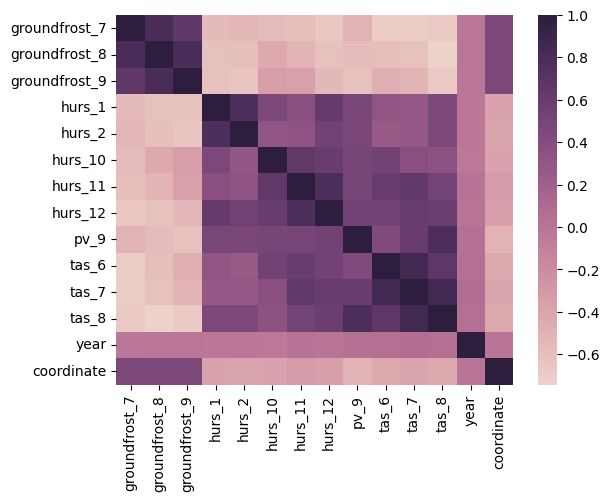

In [ ]:
import seaborn as sns
sns.heatmap(trainable_df.corr(), cmap=sns.cubehelix_palette(as_cmap=True))

# Outlier Detection

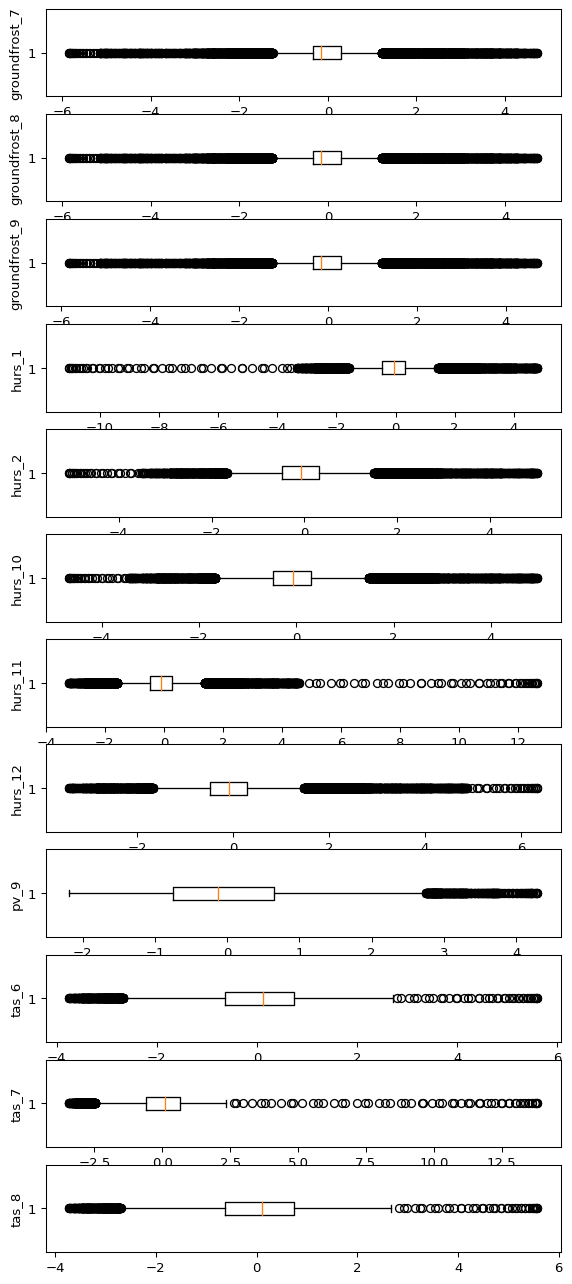

In [ ]:
# Box Plots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(12,1,dpi=95, figsize=(7,17))
i = 0
used_columns = list(trainable_df.columns)
used_columns.pop(-1) # Popping the year and coordinate column since we are not using them for outlier detection
used_columns.pop(-1)
for col in used_columns:
	axs[i].boxplot(df[col],vert=False)
	axs[i].set_ylabel(col)
	i+=1
plt.show()


In [ ]:
import numpy as np
# Identify the quartiles

def outlier_removal(df,col_name):
  q1, q3 = np.percentile(df[col_name], [25, 75])
  # Calculate the interquartile range
  iqr = q3 - q1
  # Calculate the lower and upper bounds
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  # Drop the outliers
  new_df = df[(df[col_name] >= lower_bound)
          & (df[col_name] <= upper_bound)]
  return new_df


for col_name in used_columns:
  trainable_df = outlier_removal(trainable_df,col_name)

trainable_df


,groundfrost_7,groundfrost_8,groundfrost_9,hurs_1,hurs_2,hurs_10,hurs_11,hurs_12,pv_9,tas_6,tas_7,tas_8,year,coordinate
0,-0.324180,-0.323935,-0.299057,-0.079370,-0.092607,0.105452,0.520364,0.484732,0.443839,0.697903,0.894193,0.896734,1,1
1,-0.324180,-0.323935,-0.299057,-0.079370,-0.092607,0.105452,0.520364,0.484732,0.443839,0.697903,0.894193,0.896734,1,1
2,-0.324180,-0.323935,-0.299057,-0.079370,-0.092607,0.105452,0.520364,0.484732,0.443839,0.697903,0.894193,0.896734,1,1
3,-0.324180,-0.323935,-0.299057,-0.079370,-0.092607,0.105452,0.520364,0.484732,0.443839,0.697903,0.894193,0.896734,1,1
4,-0.324180,-0.323935,-0.299057,-0.079370,-0.092607,0.105452,0.520364,0.484732,0.443839,0.697903,0.894193,0.896734,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33230,-0.324111,-0.324368,-0.232580,0.036029,0.038715,0.188222,0.190299,-0.226073,0.247328,0.319692,0.394576,0.512686,8,23
33231,-0.324111,-0.324368,-0.232580,0.036029,0.038715,0.188222,0.190299,-0.226073,0.247328,0.319692,0.394576,0.512686,8,23
33232,-0.324111,-0.324368,-0.232580,0.036029,0.038715,0.188222,0.190299,-0.226073,0.247328,0.319692,0.394576,0.512686,8,23
33233,-0.324111,-0.324368,-0.232580,0.036029,0.038715,0.188222,0.190299,-0.226073,0.247328,0.319692,0.394576,0.512686,8,23


In [ ]:
!pip install skorch
# This is a module that enables us to perform hyperparameter tuning with sckit-learn which wrapped up with pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 10.3 MB/s eta 0:00:00


# Creating The Model

In [ ]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import random
import tempfile

random_seed = 42
# To ensure reproducibility
# for PyTorch operations that use random numbers internally
random.seed(random_seed)
torch.manual_seed(random_seed)
np.random.seed(random_seed)

# Creating the network structure
class relativeHumidityRegressor_MLP(nn.Module):
    def __init__(self,
                 input_size,
                 hidden_layer_sizes,
                 output_size):
        super().__init__()
        self.hidden_l1 = nn.Linear(input_size, hidden_layer_sizes[0])
        self.hidden_l2 = nn.Linear(hidden_layer_sizes[0], hidden_layer_sizes[1])
        self.hidden_l3 = nn.Linear(hidden_layer_sizes[1], hidden_layer_sizes[2])
        self.hidden_l4 = nn.Linear(hidden_layer_sizes[2], hidden_layer_sizes[3])
        self.hidden_l5 = nn.Linear(hidden_layer_sizes[3], hidden_layer_sizes[4])
        self.hidden_l6 = nn.Linear(hidden_layer_sizes[4], hidden_layer_sizes[5])
        self.hidden_l7 = nn.Linear(hidden_layer_sizes[5], hidden_layer_sizes[6])
        self.hidden_l8 = nn.Linear(hidden_layer_sizes[6], hidden_layer_sizes[7])
        self.hidden_l9 = nn.Linear(hidden_layer_sizes[7], hidden_layer_sizes[8])
        self.output_l10 = nn.Linear(hidden_layer_sizes[8], output_size)


    def forward(self, inputs):
        out = self.hidden_l1(inputs)
        out = torch.relu(self.hidden_l2(out))
        out = torch.relu(self.hidden_l3(out))
        out = torch.relu(self.hidden_l4(out))
        out = torch.relu(self.hidden_l5(out))
        out = torch.relu(self.hidden_l6(out))
        out = torch.relu(self.hidden_l7(out))
        out = torch.relu(self.hidden_l8(out))
        out = torch.relu(self.hidden_l9(out))
        out = self.output_l10(out)
        out = torch.relu(out)
        return out


# A class for managing the data for training the model
class HumidityDataset(Dataset):
    def __init__(self, feats, labels):
        # Converting features and labels from numpy arrays to PyTorch tensors
        self.feats = torch.tensor(feats, dtype=torch.float32, requires_grad= True)
        self.labels = torch.tensor(labels, dtype=torch.float32, requires_grad= True)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):

        return self.feats[idx, :], self.labels[idx]


# Training The Data

In [ ]:
!pip install ray
# This moudle is used for hyperparameter tuning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 MB 9.5 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from copy import deepcopy
from ray import tune
from ray import train
import ray.cloudpickle as pickle
from pathlib import Path
from ray import train
from ray.train import Checkpoint, get_checkpoint

def load_data():
  feats = np.array(trainable_df.drop(["hurs_12"],axis=1),dtype=np.float16)
  labels = np.array(trainable_df["hurs_12"],dtype=np.float16)

  X_rem,x_test,y_rem,y_test = train_test_split(feats,labels, test_size = 0.1, random_state = 42)
  x_train,x_val,y_train,y_val = train_test_split(X_rem,y_rem, test_size = 0.1, random_state = 42)

  train_set = HumidityDataset(x_train, y_train)
  val_set = HumidityDataset(x_val, y_val)
  test_set = HumidityDataset(x_test, y_test)

  return train_set,val_set,test_set

def train_model(config):

  train_set,val_set,test_set = load_data()
  # Creating an instance of the MLP network
  feature_count = train_set.feats.shape[1]
  hidden_layer_sizes = [32,32,64,128,256,128,64,32,32]
  model = relativeHumidityRegressor_MLP(feature_count, hidden_layer_sizes,1)


  train_dataloader = DataLoader(train_set, batch_size=config['batch_size'], shuffle = True)
  val_dataloader = DataLoader(val_set, batch_size=config['batch_size'], shuffle = True)

  # Setting up the data loading by batch
  # With the test and validation sets having only one batch


  # Setting up the SGD optimizer for updating the model weights
  optimizer = optim.SGD(model.parameters(), lr=config['lr'])

  # Computing cross entropy loss against the training labels
  loss_function = nn.MSELoss()

  best_model_loss = np.inf
  train_losses = []

  checkpoint = get_checkpoint()
  if checkpoint:
      with checkpoint.as_directory() as checkpoint_dir:
          data_path = Path(checkpoint_dir) / "data.pkl"
          with open(data_path, "rb") as fp:
              checkpoint_state = pickle.load(fp)
          start_epoch = checkpoint_state["epoch"]
          model.load_state_dict(checkpoint_state["net_state_dict"])
          optimizer.load_state_dict(checkpoint_state["optimizer_state_dict"])
  else:
      start_epoch = 0

  num_epochs = 10
  # Iterating over the dataset at two different staages:
  # 1. Iterating over the batches in the dataset (inner for loop below)
  # One complete set of iteration through the dataset (i.e. having gone over
  # all batches in the dataset at least once) = One epoch
  # 2. Iterating over the specified numeber of epochs (outer for loop below)
  for epoch in range(0, num_epochs):

      # Setting the model to training mode
      model.train()

      if epoch == 0:  best_model = deepcopy(model)

      for batch, (X_train, y_train) in enumerate(train_dataloader):

        # Zeroing out the `.grad` buffers,
        # otherwise on the backward pass we'll add the
        # new gradients to the old ones.
        optimizer.zero_grad()

        # Computing the forward pass and then the loss
        train_pred = model.forward(X_train)
        train_loss = loss_function(train_pred, y_train)
        train_losses.append(train_loss.item())
        # Computing the model parameters' gradients
        # and propagating the loss backwards through the network.

        train_loss.backward()

        # Updating the model parameters using those gradients
        optimizer.step()

      print("epoch: {} - train loss: {:.4f}".format(
        epoch,
        train_loss.item()))

      val_losses = []
      val_steps = 0
      # Evaluating on the validation set
      model.eval()
      for batch, (X_val, y_val) in enumerate(val_dataloader):
        with torch.no_grad():
          val_pred = model.forward(X_val)
          val_loss = loss_function(val_pred, y_val).numpy()
          val_losses.append(val_loss)
          val_steps += 1

      # if val_loss < best_model_loss:
      #   best_model_loss = val_loss
      #   best_model = deepcopy(model)
      #   print('Found improvement in performance. New model saved.')

        checkpoint_data = {
              "epoch": epoch,
              "net_state_dict": model.state_dict(),
              "optimizer_state_dict": optimizer.state_dict(),
          }
        with tempfile.TemporaryDirectory() as checkpoint_dir:
            data_path = Path(checkpoint_dir) / "data.pkl"
            with open(data_path, "wb") as fp:
                pickle.dump(checkpoint_data, fp)

            checkpoint = Checkpoint.from_directory(checkpoint_dir)
            train.report(
                {"loss": val_loss / val_steps},
                checkpoint=checkpoint,
            )




      # # How well the network does on the batches
      # # is an indication of how well training is progressing
      # print("epoch: {} val loss: {:.4f}".format(
      #     epoch,
      #     val_loss.item() ))


  #model = best_model
  print("Finished Training")


# Hyperparameter Tuning

In [ ]:
import os
from functools import partial

def main(num_samples=10, max_num_epochs=30):
    config = {
        "lr": tune.loguniform(1e-4, 1e-1),
        "batch_size": tune.choice([8, 16,32,64]),
    }

    result = tune.run(
        train_model,
        config=config
    )



    best_trained_model = Net(best_trial.config["l1"], best_trial.config["l2"])
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if gpus_per_trial > 1:
            best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint = result.get_best_checkpoint(trial=best_trial, metric="accuracy", mode="max")
    with best_checkpoint.as_directory() as checkpoint_dir:
        data_path = Path(checkpoint_dir) / "data.pkl"
        with open(data_path, "rb") as fp:
            best_checkpoint_data = pickle.load(fp)

        best_trained_model.load_state_dict(best_checkpoint_data["net_state_dict"])
        test_acc = test_accuracy(best_trained_model, device)
        print("Best trial test set accuracy: {}".format(test_acc))


if __name__ == "__main__":
    main(num_samples=10, max_num_epochs=10)

2024-08-12 17:24:04,949	WARNING callback.py:136 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


+--------------------------------------------------------------------+
| Configuration for experiment     train_model_2024-08-12_17-24-04   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 1                                 |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/train_model_2024-08-12_17-24-04

Trial status: 1 PENDING
Current time: 2024-08-12 17:24:05. Total running time: 0s
Logical resource usage: 1.0/2 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+---------------------------------------------------------------+
| Trial name                status            lr     batch_size |
+---------------------------------------------------------------+
| train_model_aca12_00000   PENDING    0.0133112             16 |
+-

(train_model pid=6340) /usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
(train_model pid=6340)   return F.mse_loss(input, target, reduction=self.reduction)



Trial train_model_aca12_00000 finished iteration 1 at 2024-08-12 17:24:16. Total running time: 11s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000000 |
| time_this_iter_s                                   7.72309 |
| time_total_s                                       7.72309 |
| training_iteration                                       1 |
| loss                                               0.21136 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 1 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000000

Trial train_model_aca12_00000 finished iteration 2 at 2024-08-12 17:24:16. Total running time: 11s
+------------------

(train_model pid=6340) /usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([15])) that is different to the input size (torch.Size([15, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
(train_model pid=6340)   return F.mse_loss(input, target, reduction=self.reduction)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000000)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000001)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/tr


Trial train_model_aca12_00000 finished iteration 22 at 2024-08-12 17:24:16. Total running time: 11s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000021 |
| time_this_iter_s                                   0.00436 |
| time_total_s                                       7.81779 |
| training_iteration                                      22 |
| loss                                               0.00436 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 22 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000021

Trial train_model_aca12_00000 finished iteration 23 at 2024-08-12 17:24:16. Total running time: 11s
+---------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000019)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000020)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000021)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000022)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 42 at 2024-08-12 17:24:16. Total running time: 12s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000041 |
| time_this_iter_s                                   0.00789 |
| time_total_s                                       7.92642 |
| training_iteration                                      42 |
| loss                                               0.00222 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 42 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000041

Trial train_model_aca12_00000 finished iteration 43 at 2024-08-12 17:24:17. Total running time: 12s
+---------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000038)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000039)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000040)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000041)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 63 at 2024-08-12 17:24:17. Total running time: 12s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000062 |
| time_this_iter_s                                   0.00805 |
| time_total_s                                       8.02949 |
| training_iteration                                      63 |
| loss                                               0.00272 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 63 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000062

Trial train_model_aca12_00000 finished iteration 64 at 2024-08-12 17:24:17. Total running time: 12s
+---------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000060)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000061)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000062)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000063)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 84 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000083

Trial train_model_aca12_00000 finished iteration 85 at 2024-08-12 17:24:17. Total running time: 12s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000084 |
| time_this_iter_s                                   0.00487 |
| time_total_s                                       8.12943 |
| training_iteration                                      85 |
| loss                                               0.00284 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 85 at: (local)/root/ray_results/train_model_2024-08-12

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000081)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000082)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000083)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000084)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 104 at 2024-08-12 17:24:17. Total running time: 12s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000103 |
| time_this_iter_s                                   0.00752 |
| time_total_s                                       8.22594 |
| training_iteration                                     104 |
| loss                                               0.00213 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 104 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000103

Trial train_model_aca12_00000 finished iteration 105 at 2024-08-12 17:24:17. Total running time: 12s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000101)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000102)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000103)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000104)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 125 at 2024-08-12 17:24:17. Total running time: 12s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000124 |
| time_this_iter_s                                   0.00931 |
| time_total_s                                       8.33448 |
| training_iteration                                     125 |
| loss                                               0.00084 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 125 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000124

Trial train_model_aca12_00000 finished iteration 126 at 2024-08-12 17:24:17. Total running time: 12s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000122)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000123)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000124)
(train_model pid=6340) /usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Trial train_model_aca12_00000 finished iteration 127 at 2024-08-12 17:24:23. Total running time: 18s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000126 |
| time_this_iter_s                                   5.91972 |
| time_total_s                                      14.26013 |
| training_iteration                                     127 |
| loss                                               0.25484 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 127 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000126

Trial train_model_aca12_00000 finished iteration 128 at 2024-08-12 17:24:23. Total running time: 18s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000126)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000127)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000128)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000129)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 143 at 2024-08-12 17:24:23. Total running time: 19s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000142 |
| time_this_iter_s                                   0.00584 |
| time_total_s                                      14.35988 |
| training_iteration                                     143 |
| loss                                               0.01087 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 143 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000142

Trial train_model_aca12_00000 finished iteration 144 at 2024-08-12 17:24:23. Total running time: 19s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000138)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000139)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000140)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000141)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 159 at 2024-08-12 17:24:24. Total running time: 19s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000158 |
| time_this_iter_s                                   0.00928 |
| time_total_s                                      14.46604 |
| training_iteration                                     159 |
| loss                                               0.00494 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 159 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000158

Trial train_model_aca12_00000 finished iteration 160 at 2024-08-12 17:24:24. Total running time: 19s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000154)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000155)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000156)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000157)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 172 at 2024-08-12 17:24:24. Total running time: 19s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000171 |
| time_this_iter_s                                   0.00613 |
| time_total_s                                      14.56266 |
| training_iteration                                     172 |
| loss                                               0.00431 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 172 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000171

Trial train_model_aca12_00000 finished iteration 173 at 2024-08-12 17:24:24. Total running time: 19s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000168)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000169)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000170)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000171)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 184 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000183

Trial train_model_aca12_00000 finished iteration 185 at 2024-08-12 17:24:24. Total running time: 19s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000184 |
| time_this_iter_s                                    0.0069 |
| time_total_s                                      14.66546 |
| training_iteration                                     185 |
| loss                                               0.00244 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 185 at: (local)/root/ray_results/train_model_2024-08

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000181)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000182)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000183)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000184)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 196 at 2024-08-12 17:24:24. Total running time: 19s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000195 |
| time_this_iter_s                                   0.00973 |
| time_total_s                                      14.76938 |
| training_iteration                                     196 |
| loss                                               0.00215 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 196 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000195

Trial train_model_aca12_00000 finished iteration 197 at 2024-08-12 17:24:24. Total running time: 19s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000192)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000193)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000194)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000195)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 209 at 2024-08-12 17:24:25. Total running time: 20s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000208 |
| time_this_iter_s                                   0.00687 |
| time_total_s                                      14.88013 |
| training_iteration                                     209 |
| loss                                               0.00126 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 209 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000208

Trial train_model_aca12_00000 finished iteration 210 at 2024-08-12 17:24:25. Total running time: 20s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000205)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000206)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000207)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000208)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 222 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000221

Trial train_model_aca12_00000 finished iteration 223 at 2024-08-12 17:24:25. Total running time: 20s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000222 |
| time_this_iter_s                                   0.00559 |
| time_total_s                                       14.9802 |
| training_iteration                                     223 |
| loss                                               0.00294 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 223 at: (local)/root/ray_results/train_model_2024-08

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000220)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000221)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000222)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000223)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 238 at 2024-08-12 17:24:25. Total running time: 20s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000237 |
| time_this_iter_s                                   0.01503 |
| time_total_s                                      15.08718 |
| training_iteration                                     238 |
| loss                                               0.00132 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 238 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000237

Trial train_model_aca12_00000 finished iteration 239 at 2024-08-12 17:24:25. Total running time: 20s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000234)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000235)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000236)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000237)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 253 at 2024-08-12 17:24:32. Total running time: 27s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000252 |
| time_this_iter_s                                   6.59476 |
| time_total_s                                      21.77746 |
| training_iteration                                     253 |
| loss                                               0.19718 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 253 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000252

Trial train_model_aca12_00000 finished iteration 254 at 2024-08-12 17:24:32. Total running time: 27s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000252)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000253)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000254)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000255)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 274 at 2024-08-12 17:24:32. Total running time: 27s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000273 |
| time_this_iter_s                                    0.0075 |
| time_total_s                                      21.88306 |
| training_iteration                                     274 |
| loss                                               0.00701 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 274 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000273

Trial train_model_aca12_00000 finished iteration 275 at 2024-08-12 17:24:32. Total running time: 27s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000271)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000272)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000273)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000274)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 294 at 2024-08-12 17:24:32. Total running time: 27s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000293 |
| time_this_iter_s                                   0.00681 |
| time_total_s                                       21.9828 |
| training_iteration                                     294 |
| loss                                               0.00488 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 294 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000293

Trial train_model_aca12_00000 finished iteration 295 at 2024-08-12 17:24:32. Total running time: 27s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000292)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000293)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000294)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000295)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 314 at 2024-08-12 17:24:32. Total running time: 27s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000313 |
| time_this_iter_s                                   0.00454 |
| time_total_s                                      22.08146 |
| training_iteration                                     314 |
| loss                                                0.0024 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 314 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000313

Trial train_model_aca12_00000 finished iteration 315 at 2024-08-12 17:24:32. Total running time: 27s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000312)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000313)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000314)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000315)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 334 at 2024-08-12 17:24:33. Total running time: 28s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000333 |
| time_this_iter_s                                   0.00838 |
| time_total_s                                      22.20264 |
| training_iteration                                     334 |
| loss                                               0.00135 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 334 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000333

Trial train_model_aca12_00000 finished iteration 335 at 2024-08-12 17:24:33. Total running time: 28s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000333)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000334)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000335)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000336)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 353 at 2024-08-12 17:24:33. Total running time: 28s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000352 |
| time_this_iter_s                                   0.01208 |
| time_total_s                                      22.30638 |
| training_iteration                                     353 |
| loss                                               0.00179 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 353 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000352

Trial train_model_aca12_00000 finished iteration 354 at 2024-08-12 17:24:33. Total running time: 28s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000352)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000353)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000354)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000355)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 374 at 2024-08-12 17:24:33. Total running time: 28s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000373 |
| time_this_iter_s                                   0.01244 |
| time_total_s                                      22.41205 |
| training_iteration                                     374 |
| loss                                               0.00102 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 374 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000373

Trial train_model_aca12_00000 finished iteration 375 at 2024-08-12 17:24:33. Total running time: 28s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000373)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000374)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000375)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000376)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial status: 1 RUNNING
Current time: 2024-08-12 17:24:35. Total running time: 30s
Logical resource usage: 1.0/2 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+--------------------------------------------------------------------------------------------------------+
| Trial name                status            lr     batch_size     iter     total time (s)         loss |
+--------------------------------------------------------------------------------------------------------+
| train_model_aca12_00000   RUNNING    0.0133112             16      378             22.431   0.00145433 |
+--------------------------------------------------------------------------------------------------------+

Trial train_model_aca12_00000 finished iteration 379 at 2024-08-12 17:24:39. Total running time: 34s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_di

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000378)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000379)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000380)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000381)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 394 at 2024-08-12 17:24:39. Total running time: 34s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000393 |
| time_this_iter_s                                   0.00848 |
| time_total_s                                      28.45882 |
| training_iteration                                     394 |
| loss                                               0.00311 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 394 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000393

Trial train_model_aca12_00000 finished iteration 395 at 2024-08-12 17:24:39. Total running time: 34s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000390)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000391)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000392)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000393)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 408 at 2024-08-12 17:24:39. Total running time: 34s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000407 |
| time_this_iter_s                                   0.00741 |
| time_total_s                                      28.55542 |
| training_iteration                                     408 |
| loss                                               0.00554 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 408 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000407

Trial train_model_aca12_00000 finished iteration 409 at 2024-08-12 17:24:39. Total running time: 34s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000403)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000404)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000405)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000406)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 422 at 2024-08-12 17:24:40. Total running time: 35s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000421 |
| time_this_iter_s                                   0.00862 |
| time_total_s                                      28.65488 |
| training_iteration                                     422 |
| loss                                               0.00439 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 422 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000421

Trial train_model_aca12_00000 finished iteration 423 at 2024-08-12 17:24:40. Total running time: 35s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000417)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000418)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000419)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000420)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 436 at 2024-08-12 17:24:40. Total running time: 35s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000435 |
| time_this_iter_s                                    0.0113 |
| time_total_s                                      28.76661 |
| training_iteration                                     436 |
| loss                                               0.00335 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 436 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000435

Trial train_model_aca12_00000 finished iteration 437 at 2024-08-12 17:24:40. Total running time: 35s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000432)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000433)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000434)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000435)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 449 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000448

Trial train_model_aca12_00000 finished iteration 450 at 2024-08-12 17:24:40. Total running time: 35s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000449 |
| time_this_iter_s                                   0.01022 |
| time_total_s                                      28.87981 |
| training_iteration                                     450 |
| loss                                               0.00199 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 450 at: (local)/root/ray_results/train_model_2024-08

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000445)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000446)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000447)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000448)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 463 at 2024-08-12 17:24:40. Total running time: 35s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000462 |
| time_this_iter_s                                   0.01382 |
| time_total_s                                      28.97889 |
| training_iteration                                     463 |
| loss                                               0.00251 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 463 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000462

Trial train_model_aca12_00000 finished iteration 464 at 2024-08-12 17:24:40. Total running time: 35s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000459)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000460)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000461)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000462)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 476 at 2024-08-12 17:24:40. Total running time: 35s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000475 |
| time_this_iter_s                                    0.0145 |
| time_total_s                                      29.10159 |
| training_iteration                                     476 |
| loss                                               0.00233 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 476 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000475

Trial train_model_aca12_00000 finished iteration 477 at 2024-08-12 17:24:40. Total running time: 36s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000471)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000472)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000473)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000474)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 489 at 2024-08-12 17:24:41. Total running time: 36s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000488 |
| time_this_iter_s                                   0.01712 |
| time_total_s                                      29.20321 |
| training_iteration                                     489 |
| loss                                                0.0018 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 489 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000488

Trial train_model_aca12_00000 finished iteration 490 at 2024-08-12 17:24:41. Total running time: 36s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000484)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000485)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000486)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000487)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 504 at 2024-08-12 17:24:41. Total running time: 36s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000503 |
| time_this_iter_s                                   0.00886 |
| time_total_s                                      29.30276 |
| training_iteration                                     504 |
| loss                                               0.00154 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 504 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000503


(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000498)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000499)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000500)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000501)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 505 at 2024-08-12 17:24:48. Total running time: 43s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000504 |
| time_this_iter_s                                   6.67398 |
| time_total_s                                      35.97674 |
| training_iteration                                     505 |
| loss                                               0.16512 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 505 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000504

Trial train_model_aca12_00000 finished iteration 506 at 2024-08-12 17:24:48. Total running time: 43s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000504)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000505)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000506)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000507)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 526 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000525

Trial train_model_aca12_00000 finished iteration 527 at 2024-08-12 17:24:48. Total running time: 43s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000526 |
| time_this_iter_s                                   0.00628 |
| time_total_s                                      36.08398 |
| training_iteration                                     527 |
| loss                                               0.01091 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 527 at: (local)/root/ray_results/train_model_2024-08

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000522)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000523)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000524)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000525)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 546 at 2024-08-12 17:24:48. Total running time: 43s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000545 |
| time_this_iter_s                                   0.00499 |
| time_total_s                                      36.17895 |
| training_iteration                                     546 |
| loss                                                0.0067 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 546 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000545

Trial train_model_aca12_00000 finished iteration 547 at 2024-08-12 17:24:48. Total running time: 43s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000543)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000544)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000545)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000546)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 565 at 2024-08-12 17:24:48. Total running time: 43s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000564 |
| time_this_iter_s                                    0.0044 |
| time_total_s                                      36.28066 |
| training_iteration                                     565 |
| loss                                               0.00203 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 565 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000564

Trial train_model_aca12_00000 finished iteration 566 at 2024-08-12 17:24:48. Total running time: 43s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000563)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000564)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000565)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000566)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 584 at 2024-08-12 17:24:48. Total running time: 43s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000583 |
| time_this_iter_s                                   0.00749 |
| time_total_s                                       36.3785 |
| training_iteration                                     584 |
| loss                                               0.00369 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 584 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000583

Trial train_model_aca12_00000 finished iteration 585 at 2024-08-12 17:24:48. Total running time: 43s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000583)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000584)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000585)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000586)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 602 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000601

Trial train_model_aca12_00000 finished iteration 603 at 2024-08-12 17:24:49. Total running time: 44s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000602 |
| time_this_iter_s                                   0.00645 |
| time_total_s                                      36.48804 |
| training_iteration                                     603 |
| loss                                               0.00183 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 603 at: (local)/root/ray_results/train_model_2024-08

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000601)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000602)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000603)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000604)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 623 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000622

Trial train_model_aca12_00000 finished iteration 624 at 2024-08-12 17:24:49. Total running time: 44s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000623 |
| time_this_iter_s                                   0.00602 |
| time_total_s                                      36.58719 |
| training_iteration                                     624 |
| loss                                               0.00107 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 624 at: (local)/root/ray_results/train_model_2024-08

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000622)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000623)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000624)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000625)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 631 at 2024-08-12 17:24:55. Total running time: 50s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000630 |
| time_this_iter_s                                    5.7959 |
| time_total_s                                      42.41117 |
| training_iteration                                     631 |
| loss                                               0.20776 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 631 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000630

Trial train_model_aca12_00000 finished iteration 632 at 2024-08-12 17:24:55. Total running time: 50s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000630)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000631)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000632)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000633)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 645 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000644

Trial train_model_aca12_00000 finished iteration 646 at 2024-08-12 17:24:55. Total running time: 50s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000645 |
| time_this_iter_s                                   0.01272 |
| time_total_s                                      42.51711 |
| training_iteration                                     646 |
| loss                                               0.00914 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 646 at: (local)/root/ray_results/train_model_2024-08

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000659)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000660)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000661)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000662)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 674 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000673

Trial train_model_aca12_00000 finished iteration 675 at 2024-08-12 17:24:55. Total running time: 50s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000674 |
| time_this_iter_s                                    0.0081 |
| time_total_s                                      42.72878 |
| training_iteration                                     675 |
| loss                                                0.0051 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 675 at: (local)/root/ray_results/train_model_2024-08

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000673)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000674)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000675)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000676)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 688 at 2024-08-12 17:24:56. Total running time: 51s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000687 |
| time_this_iter_s                                   0.04399 |
| time_total_s                                      42.86037 |
| training_iteration                                     688 |
| loss                                               0.00478 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 688 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000687

Trial train_model_aca12_00000 finished iteration 689 at 2024-08-12 17:24:56. Total running time: 51s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000687)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000688)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000689)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000690)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 701 at 2024-08-12 17:24:56. Total running time: 51s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000700 |
| time_this_iter_s                                   0.00698 |
| time_total_s                                       42.9639 |
| training_iteration                                     701 |
| loss                                               0.00226 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 701 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000700

Trial train_model_aca12_00000 finished iteration 702 at 2024-08-12 17:24:56. Total running time: 51s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000698)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000699)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000700)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000701)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 714 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000713

Trial train_model_aca12_00000 finished iteration 715 at 2024-08-12 17:24:56. Total running time: 51s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000714 |
| time_this_iter_s                                   0.01122 |
| time_total_s                                      43.07255 |
| training_iteration                                     715 |
| loss                                               0.00163 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 715 at: (local)/root/ray_results/train_model_2024-08

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000711)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000712)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000713)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000714)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 728 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000727

Trial train_model_aca12_00000 finished iteration 729 at 2024-08-12 17:24:56. Total running time: 51s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000728 |
| time_this_iter_s                                   0.00858 |
| time_total_s                                      43.16167 |
| training_iteration                                     729 |
| loss                                               0.00345 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 729 at: (local)/root/ray_results/train_model_2024-08

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000726)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000727)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000728)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000729)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 741 at 2024-08-12 17:24:56. Total running time: 51s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000740 |
| time_this_iter_s                                   0.01226 |
| time_total_s                                      43.26545 |
| training_iteration                                     741 |
| loss                                               0.00176 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 741 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000740

Trial train_model_aca12_00000 finished iteration 742 at 2024-08-12 17:24:56. Total running time: 51s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000739)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000740)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000741)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000742)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 753 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000752

Trial train_model_aca12_00000 finished iteration 754 at 2024-08-12 17:24:57. Total running time: 52s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000753 |
| time_this_iter_s                                    0.0064 |
| time_total_s                                      43.36801 |
| training_iteration                                     754 |
| loss                                               0.00144 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 754 at: (local)/root/ray_results/train_model_2024-08

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000751)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000752)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000753)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000754)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 757 at 2024-08-12 17:25:03. Total running time: 58s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000756 |
| time_this_iter_s                                   6.62819 |
| time_total_s                                      50.00877 |
| training_iteration                                     757 |
| loss                                               0.27457 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 757 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000756

Trial train_model_aca12_00000 finished iteration 758 at 2024-08-12 17:25:03. Total running time: 58s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000756)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000757)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000758)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000759)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 778 at 2024-08-12 17:25:04. Total running time: 59s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000777 |
| time_this_iter_s                                   0.00591 |
| time_total_s                                      50.10828 |
| training_iteration                                     778 |
| loss                                               0.00533 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 778 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000777

Trial train_model_aca12_00000 finished iteration 779 at 2024-08-12 17:25:04. Total running time: 59s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000769)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000770)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000771)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000772)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 798 at 2024-08-12 17:25:04. Total running time: 59s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000797 |
| time_this_iter_s                                   0.00455 |
| time_total_s                                      50.20693 |
| training_iteration                                     798 |
| loss                                               0.00499 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 798 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000797

Trial train_model_aca12_00000 finished iteration 799 at 2024-08-12 17:25:04. Total running time: 59s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000789)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000790)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000791)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000792)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 818 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000817

Trial train_model_aca12_00000 finished iteration 819 at 2024-08-12 17:25:04. Total running time: 59s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000818 |
| time_this_iter_s                                   0.00609 |
| time_total_s                                      50.30617 |
| training_iteration                                     819 |
| loss                                               0.00167 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 819 at: (local)/root/ray_results/train_model_2024-08

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000810)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000811)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000812)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000813)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 837 at 2024-08-12 17:25:04. Total running time: 59s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000836 |
| time_this_iter_s                                   0.00675 |
| time_total_s                                      50.41424 |
| training_iteration                                     837 |
| loss                                               0.00142 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 837 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000836

Trial train_model_aca12_00000 finished iteration 838 at 2024-08-12 17:25:04. Total running time: 59s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000828)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000829)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000830)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000831)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 856 at 2024-08-12 17:25:04. Total running time: 59s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000855 |
| time_this_iter_s                                   0.00714 |
| time_total_s                                      50.51619 |
| training_iteration                                     856 |
| loss                                               0.00193 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 856 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000855

Trial train_model_aca12_00000 finished iteration 857 at 2024-08-12 17:25:04. Total running time: 59s
+------------

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000849)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000850)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000851)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000852)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 876 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000875

Trial train_model_aca12_00000 finished iteration 877 at 2024-08-12 17:25:05. Total running time: 1min 0s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000876 |
| time_this_iter_s                                   0.01547 |
| time_total_s                                      50.62908 |
| training_iteration                                     877 |
| loss                                               0.00123 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 877 at: (local)/root/ray_results/train_model_202

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000868)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000869)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000870)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000871)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 883 at 2024-08-12 17:25:10. Total running time: 1min 5s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000882 |
| time_this_iter_s                                   5.67764 |
| time_total_s                                      56.33949 |
| training_iteration                                     883 |
| loss                                               0.25703 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 883 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000882

Trial train_model_aca12_00000 finished iteration 884 at 2024-08-12 17:25:10. Total running time: 1min 5s
+----

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000882)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000883)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000884)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000885)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 897 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000896

Trial train_model_aca12_00000 finished iteration 898 at 2024-08-12 17:25:11. Total running time: 1min 6s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000897 |
| time_this_iter_s                                   0.00959 |
| time_total_s                                      56.44623 |
| training_iteration                                     898 |
| loss                                               0.00952 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 898 at: (local)/root/ray_results/train_model_202

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000894)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000895)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000896)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000897)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 912 at 2024-08-12 17:25:11. Total running time: 1min 6s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000911 |
| time_this_iter_s                                   0.00725 |
| time_total_s                                      56.54173 |
| training_iteration                                     912 |
| loss                                               0.00673 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 912 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000911

Trial train_model_aca12_00000 finished iteration 913 at 2024-08-12 17:25:11. Total running time: 1min 6s
+----

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000909)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000910)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000911)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000912)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 927 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000926

Trial train_model_aca12_00000 finished iteration 928 at 2024-08-12 17:25:11. Total running time: 1min 6s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000927 |
| time_this_iter_s                                   0.01156 |
| time_total_s                                      56.65824 |
| training_iteration                                     928 |
| loss                                               0.00357 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 928 at: (local)/root/ray_results/train_model_202

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000924)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000925)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000926)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000927)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 942 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000941

Trial train_model_aca12_00000 finished iteration 943 at 2024-08-12 17:25:11. Total running time: 1min 6s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000942 |
| time_this_iter_s                                   0.00614 |
| time_total_s                                      56.75845 |
| training_iteration                                     943 |
| loss                                               0.00383 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 943 at: (local)/root/ray_results/train_model_202

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000939)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000940)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000941)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000942)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 956 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000955

Trial train_model_aca12_00000 finished iteration 957 at 2024-08-12 17:25:11. Total running time: 1min 6s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000956 |
| time_this_iter_s                                   0.00947 |
| time_total_s                                      56.86426 |
| training_iteration                                     957 |
| loss                                               0.00196 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 957 at: (local)/root/ray_results/train_model_202

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000954)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000955)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000956)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000957)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 969 at 2024-08-12 17:25:12. Total running time: 1min 7s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000968 |
| time_this_iter_s                                    0.0147 |
| time_total_s                                      56.97344 |
| training_iteration                                     969 |
| loss                                               0.00206 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 969 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000968

Trial train_model_aca12_00000 finished iteration 970 at 2024-08-12 17:25:12. Total running time: 1min 7s
+----

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000967)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000968)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000969)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000970)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 980 at 2024-08-12 17:25:12. Total running time: 1min 7s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000979 |
| time_this_iter_s                                   0.00953 |
| time_total_s                                      57.07759 |
| training_iteration                                     980 |
| loss                                               0.00238 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 980 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000979

Trial train_model_aca12_00000 finished iteration 981 at 2024-08-12 17:25:12. Total running time: 1min 7s
+----

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000977)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000978)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000979)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000980)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 996 at 2024-08-12 17:25:12. Total running time: 1min 7s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_000995 |
| time_this_iter_s                                   0.00976 |
| time_total_s                                      57.18583 |
| training_iteration                                     996 |
| loss                                               0.00124 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 996 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000995

Trial train_model_aca12_00000 finished iteration 997 at 2024-08-12 17:25:12. Total running time: 1min 7s
+----

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000994)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000995)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000996)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_000997)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 1009 at 2024-08-12 17:25:19. Total running time: 1min 14s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_001008 |
| time_this_iter_s                                   6.65251 |
| time_total_s                                      63.91944 |
| training_iteration                                    1009 |
| loss                                               0.16428 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 1009 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001008

Trial train_model_aca12_00000 finished iteration 1010 at 2024-08-12 17:25:19. Total running time: 1min 14s


(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001008)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001009)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001010)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001011)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 1030 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001029

Trial train_model_aca12_00000 finished iteration 1031 at 2024-08-12 17:25:19. Total running time: 1min 14s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_001030 |
| time_this_iter_s                                   0.00665 |
| time_total_s                                      64.02745 |
| training_iteration                                    1031 |
| loss                                               0.00881 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 1031 at: (local)/root/ray_results/train_model

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001026)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001027)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001028)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001029)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 1050 at 2024-08-12 17:25:19. Total running time: 1min 14s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_001049 |
| time_this_iter_s                                   0.00594 |
| time_total_s                                      64.12619 |
| training_iteration                                    1050 |
| loss                                               0.00274 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 1050 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001049

Trial train_model_aca12_00000 finished iteration 1051 at 2024-08-12 17:25:19. Total running time: 1min 14s


(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001046)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001047)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001048)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001049)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 1069 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001068

Trial train_model_aca12_00000 finished iteration 1070 at 2024-08-12 17:25:19. Total running time: 1min 14s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_001069 |
| time_this_iter_s                                   0.00678 |
| time_total_s                                      64.22706 |
| training_iteration                                    1070 |
| loss                                               0.00178 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 1070 at: (local)/root/ray_results/train_model

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001068)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001069)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001070)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001071)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 1089 at 2024-08-12 17:25:20. Total running time: 1min 15s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_001088 |
| time_this_iter_s                                    0.0203 |
| time_total_s                                      64.33688 |
| training_iteration                                    1089 |
| loss                                               0.00187 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 1089 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001088

Trial train_model_aca12_00000 finished iteration 1090 at 2024-08-12 17:25:20. Total running time: 1min 15s


(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001088)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001089)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001090)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001091)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 1108 at 2024-08-12 17:25:20. Total running time: 1min 15s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_001107 |
| time_this_iter_s                                   0.00431 |
| time_total_s                                       64.4346 |
| training_iteration                                    1108 |
| loss                                               0.00332 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 1108 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001107

Trial train_model_aca12_00000 finished iteration 1109 at 2024-08-12 17:25:20. Total running time: 1min 15s


(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001106)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001107)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001108)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001109)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 1126 at 2024-08-12 17:25:20. Total running time: 1min 15s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_001125 |
| time_this_iter_s                                   0.00608 |
| time_total_s                                      64.54329 |
| training_iteration                                    1126 |
| loss                                               0.00185 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 1126 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001125

Trial train_model_aca12_00000 finished iteration 1127 at 2024-08-12 17:25:20. Total running time: 1min 15s


(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001124)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001125)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001126)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001127)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 1135 at 2024-08-12 17:25:26. Total running time: 1min 21s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_001134 |
| time_this_iter_s                                   5.84488 |
| time_total_s                                      70.43311 |
| training_iteration                                    1135 |
| loss                                                 0.094 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 1135 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001134

Trial train_model_aca12_00000 finished iteration 1136 at 2024-08-12 17:25:26. Total running time: 1min 21s


(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001134)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001135)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001136)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001137)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 1150 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001149

Trial train_model_aca12_00000 finished iteration 1151 at 2024-08-12 17:25:26. Total running time: 1min 21s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_001150 |
| time_this_iter_s                                   0.00885 |
| time_total_s                                      70.54266 |
| training_iteration                                    1151 |
| loss                                               0.00784 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 1151 at: (local)/root/ray_results/train_model

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001146)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001147)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001148)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001149)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 1165 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001164

Trial train_model_aca12_00000 finished iteration 1166 at 2024-08-12 17:25:26. Total running time: 1min 22s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_001165 |
| time_this_iter_s                                   0.00587 |
| time_total_s                                      70.64803 |
| training_iteration                                    1166 |
| loss                                                0.0045 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 1166 at: (local)/root/ray_results/train_model

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001161)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001162)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001163)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001164)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 1180 at 2024-08-12 17:25:27. Total running time: 1min 22s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_001179 |
| time_this_iter_s                                   0.00969 |
| time_total_s                                      70.74946 |
| training_iteration                                    1180 |
| loss                                               0.00353 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 1180 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001179

Trial train_model_aca12_00000 finished iteration 1181 at 2024-08-12 17:25:27. Total running time: 1min 22s


(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001176)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001177)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001178)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001179)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 1193 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001192

Trial train_model_aca12_00000 finished iteration 1194 at 2024-08-12 17:25:27. Total running time: 1min 22s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_001193 |
| time_this_iter_s                                    0.0068 |
| time_total_s                                      70.85091 |
| training_iteration                                    1194 |
| loss                                               0.00373 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 1194 at: (local)/root/ray_results/train_model

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001189)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001190)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001191)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001192)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 1205 at 2024-08-12 17:25:27. Total running time: 1min 22s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_001204 |
| time_this_iter_s                                   0.01191 |
| time_total_s                                      70.96529 |
| training_iteration                                    1205 |
| loss                                                0.0019 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 1205 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001204

Trial train_model_aca12_00000 finished iteration 1206 at 2024-08-12 17:25:27. Total running time: 1min 22s


(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001203)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001204)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001205)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001206)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

Trial train_model_aca12_00000 saved a checkpoint for iteration 1219 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001218

Trial train_model_aca12_00000 finished iteration 1220 at 2024-08-12 17:25:27. Total running time: 1min 22s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_001219 |
| time_this_iter_s                                   0.00684 |
| time_total_s                                      71.07712 |
| training_iteration                                    1220 |
| loss                                               0.00299 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 1220 at: (local)/root/ray_results/train_model

(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001216)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001217)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001218)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001219)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 1234 at 2024-08-12 17:25:28. Total running time: 1min 23s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_001233 |
| time_this_iter_s                                   0.01167 |
| time_total_s                                      71.17282 |
| training_iteration                                    1234 |
| loss                                               0.00153 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 1234 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001233

Trial train_model_aca12_00000 finished iteration 1235 at 2024-08-12 17:25:28. Total running time: 1min 23s


(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001231)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001232)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001233)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001234)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi


Trial train_model_aca12_00000 finished iteration 1248 at 2024-08-12 17:25:28. Total running time: 1min 23s
+------------------------------------------------------------+
| Trial train_model_aca12_00000 result                       |
+------------------------------------------------------------+
| checkpoint_dir_name                      checkpoint_001247 |
| time_this_iter_s                                   0.02054 |
| time_total_s                                      71.28518 |
| training_iteration                                    1248 |
| loss                                               0.00138 |
+------------------------------------------------------------+
Trial train_model_aca12_00000 saved a checkpoint for iteration 1248 at: (local)/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001247

Trial train_model_aca12_00000 finished iteration 1249 at 2024-08-12 17:25:28. Total running time: 1min 23s


(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001246)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001247)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001248)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/root/ray_results/train_model_2024-08-12_17-24-04/train_model_aca12_00000_0_batch_size=16,lr=0.0133_2024-08-12_17-24-04/checkpoint_001249)
(train_model pid=6340) Checkpoint successfully created at: Checkpoint(fi

(train_model pid=6340) Finished Training

Trial status: 1 TERMINATED
Current time: 2024-08-12 17:25:28. Total running time: 1min 23s
Logical resource usage: 1.0/2 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:T4)
+----------------------------------------------------------------------------------------------------------+
| Trial name                status              lr     batch_size     iter     total time (s)         loss |
+----------------------------------------------------------------------------------------------------------+
| train_model_aca12_00000   TERMINATED   0.0133112             16     1260            71.3704   0.00276121 |
+----------------------------------------------------------------------------------------------------------+



In [ ]:
best_trial = result.get_best_trial("loss", "min", "last")
print(f"Best trial config: {best_trial.config}")
print(f"Best trial final validation loss: {best_trial.last_result['loss']}")
print(f"Best trial final validation accuracy: {best_trial.last_result['accuracy']}")

AttributeError: 'Series' object has no attribute 'get_best_trial'

In [ ]:
result

,hurs_12
year,-0.002814
groundfrost_1,-0.034827
groundfrost_2,-0.156475
groundfrost_3,-0.231618
groundfrost_4,-0.341402
...,...
rainfall_9,0.090352
rainfall_10,-0.029886
rainfall_11,0.009110
rainfall_12,0.153592


# Testing The Data

In [ ]:
def test_loss(net):
    train_set,val_set,test_set = load_data()
    loss = []
    test_dataloader = DataLoader(test_set, batch_size=16, shuffle = True)

    with torch.no_grad():
      for batch, (X_test, y_test) in enumerate(test_dataloader):
          test_pred = net.forward(X_test)
          test_loss = nn.MSELoss(test_pred, y_test).numpy()

    return test_loss